In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tkinter
from collections import Counter
from sklearn import linear_model, metrics, model_selection

In [2]:
data_file = "./heart_disease_health_indicators_BRFSS2015.csv/heart_disease_health_indicators_BRFSS2015.csv"
column_names = ['Heart Disease or Attack', 'High Blood Pressure', 'High Cholesterol', 'Cholesterol Check', 'BMI', 'Smoker', 'Stroke', 'Diabetes',
                'Physical Activity', 'Fruits', 'Veggies' , 'Heavy Alcohol Consumption', 'Any Healthcare', 'No Doctor Due to Cost', 'General Health',
                'Mental Health', 'Physical Health', 'Different Walk', 'Sex', 'Age Category' , 'Education Category', 'Income Category']

In [3]:
original_df = pd.read_csv(data_file, names=column_names)
df = pd.read_csv(data_file, names=column_names)

In [4]:
df['Heart Disease or Attack'].replace({0.0: False, 1.0: True}, inplace=True)
df['High Blood Pressure'] = df['High Blood Pressure'].astype(bool)
df['High Cholesterol'] = df['High Cholesterol'].astype(bool)
df['Cholesterol Check'] = df['Cholesterol Check'].astype(bool)
df['Smoker'] = df['Smoker'].astype(bool)
df['Stroke'] = df['Stroke'].astype(bool)
df['Diabetes'] = df['Diabetes'].astype(bool)
df['Physical Activity'] = df['Physical Activity'].astype(bool)
df['Fruits'] = df['Fruits'].astype(bool)
df['Veggies'] = df['Veggies'].astype(bool)
df['Heavy Alcohol Consumption'] = df['Heavy Alcohol Consumption'].astype(bool)
df['Any Healthcare'] = df['Any Healthcare'].astype(bool)
df['No Doctor Due to Cost'] = df['No Doctor Due to Cost'].astype(bool)
df['Different Walk'] = df['Different Walk'].astype(bool)
df['Sex'].replace({0.0:"Male", 1.0:"Female"}, inplace=True)

In [5]:
df.drop(columns='Different Walk')

,Heart Disease or Attack,High Blood Pressure,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,Diabetes,Physical Activity,Fruits,...,Heavy Alcohol Consumption,Any Healthcare,No Doctor Due to Cost,General Health,Mental Health,Physical Health,Sex,Age Category,Education Category,Income Category
0,False,True,True,True,40.0,True,False,False,False,False,...,False,True,False,5.0,18.0,15.0,Male,9.0,4.0,3.0
1,False,False,False,False,25.0,True,False,False,True,False,...,False,False,True,3.0,0.0,0.0,Male,7.0,6.0,1.0
2,False,True,True,True,28.0,False,False,False,False,True,...,False,True,True,5.0,30.0,30.0,Male,9.0,4.0,8.0
3,False,True,False,True,27.0,False,False,False,True,True,...,False,True,False,2.0,0.0,0.0,Male,11.0,3.0,6.0
4,False,True,True,True,24.0,False,False,False,True,True,...,False,True,False,2.0,3.0,0.0,Male,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,False,True,True,True,45.0,False,False,False,False,True,...,False,True,False,3.0,0.0,5.0,Female,5.0,6.0,7.0
253676,False,True,True,True,18.0,False,False,True,False,False,...,False,True,False,4.0,0.0,0.0,Male,11.0,2.0,4.0
253677,False,False,False,True,28.0,False,False,False,True,True,...,False,True,False,1.0,0.0,0.0,Male,2.0,5.0,2.0
253678,False,True,False,True,23.0,False,False,False,False,True,...,False,True,False,3.0,0.0,0.0,Female,7.0,5.0,1.0


In [6]:
males = 0
females = 0
for col in df['Sex']:
    if col == 'Male':
        males += 1
    elif col == 'Female':
        females += 1

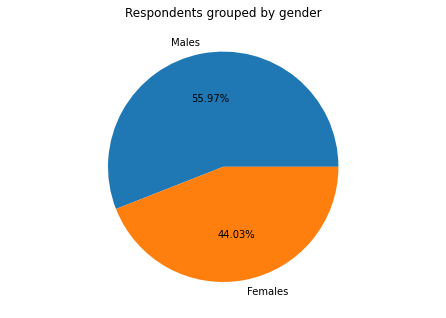

In [81]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie([males, females], labels = ['Males', 'Females'], autopct='%1.2f%%')
plt.title("Respondents grouped by gender")
plt.show()

In [8]:
correlations = {}
for col in df:
    try:
        correlations[col] = round(df['Heart Disease or Attack'].corr(df[col]), 3)
    except:
        correlations[col] = 'Comparison not available'
        
del correlations['Heart Disease or Attack']
del correlations['Sex']
del correlations['Different Walk']

In [9]:
top = Counter(correlations)
top = top.most_common()

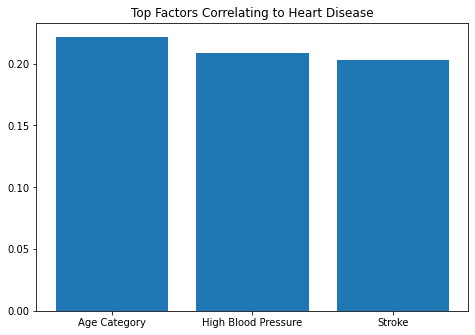

In [83]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = []
corrs = []
for i in range(1,4):
    labels.append(top[i][0])
    corrs.append(top[i][1])
ax.bar(labels, corrs)
plt.title("Top Factors Correlating to Heart Disease")
plt.show()

In [11]:
x = df['General Health']
y = df['Income Category']
x2 = []
for val in x:
    x2.append(val*1.6)

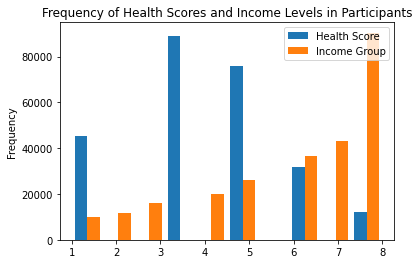

In [12]:
plt.hist([x2,y], label = ['Health Score', 'Income Group'])
plt.legend()
plt.gca().set(title='Frequency of Health Scores and Income Levels in Participants', ylabel='Frequency')
plt.show()

In [69]:
hd_model = linear_model.LogisticRegression()

y2 = original_df.values[:, 0]
x2 = original_df.values[:, 1:8]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x2, y2, test_size=0.25)

In [76]:
hd_model.fit(x_train, y_train)
y_pred = hd_model.predict(x_test)

print("Model accuracy: " + metrics.accuracy_score(y_test, y_pred))

0.9071428571428571


In [43]:
user_inputs = []

In [74]:
def getPatientInfo():
    user_inputs = []
    bp_option = input ("Does the patient have high blood pressure? Enter 'yes' or 'no': ")
    while bp_option != 'yes' and bp_option != 'no':
        print('Please enter a valid option')
        bp_option = input ("Does the patient have high blood pressure? Enter 'yes' or 'no': ")
        
    if bp_option == 'yes':
        user_inputs.append(1)
    else:
        user_inputs.append(0)

    hc_option = input ("Does the patient have high cholesterol? Enter 'yes' or 'no': ")
    while hc_option != 'yes' and hc_option != 'no':
        print('Please enter a valid option')
        hc_option = input ("Does the patient have high cholesterol? Enter 'yes' or 'no': ")

    if hc_option == 'yes':
        user_inputs.append(1)
    else:
        user_inputs.append(0)
        
    hc_check_option = input ("Has the patient had their cholesterol checked before? Enter 'yes' or 'no': ")
    while hc_check_option != 'yes' and hc_check_option != 'no':
        print('Please enter a valid option')
        hc_check_option = input ("Has the patient had their cholesterol checked before? Enter 'yes' or 'no': ")

    if hc_check_option == 'yes':
        user_inputs.append(0)
    else:
        user_inputs.append(1)
        
    bmi_option = input ('Select a value for BMI: ')
    while float(bmi_option) <= 0 and float(bmi_option) > 100:
        print('BMI should be greater than 0 and less than 100')
        bmi_option = input ('Select a value for BMI: ')
    user_inputs.append(float(bmi_option))

    smoker_option = input ("Is the patient a smoker? Enter 'yes' or 'no': ")
    while smoker_option != 'yes' and smoker_option != 'no' :
        print('Please enter a valid option')
        smoker_option = input ("Is the patient a smoker? Enter 'yes' or 'no': ")

    if smoker_option == 'yes':
        user_inputs.append(1)
    else:
        user_inputs.append(0)
        
    stroke_option = input ("Has the patient previously had a stroke? Enter 'yes' or 'no': ")
    while stroke_option != 'yes' and stroke_option != 'no':
        print('Please enter a valid option')
        stroke_option = input ("Has the patient previously had a stroke? Enter 'yes' or 'no': ")

    if stroke_option == 'yes':
        user_inputs.append(1)
    else:
        user_inputs.append(0)
        
    diab_option = input ("Does the patient have diabetes? Enter 'yes' or 'no': ")
    while diab_option != 'yes' and diab_option != 'no':
        print('Please enter a valid option')
        diab_option = input ("Does the patient have diabetes? Enter 'yes' or 'no': ")

    if diab_option == 'yes':
        user_inputs.append(1)
    else:
        user_inputs.append(0)
    

In [65]:
getPatientInfo()

Does the patient have high blood pressure? Enter 'yes' or 'no': no
Does the patient have high cholesterol? Enter 'yes' or 'no': no
Has the patient had their cholesterol checked before? Enter 'yes' or 'no': yes
Select a value for BMI: 22
Is the patient a smoker? Enter 'yes' or 'no': no
Has the patient previously had a stroke? Enter 'yes' or 'no': no
Does the patient have diabetes? Enter 'yes' or 'no': no


In [77]:
y_pred = hd_model.predict([user_inputs])

In [78]:
if y_pred[0] == 1:
    print("The model predicts that this person does have a heart disease")
else:
    print("The model predicts that this person does not have a heart disease")

The model predicts that this person does have a heart disease


In [80]:
reset_inputs = input("Would you like to enter a new patient's information? Enter 'yes' or 'no': ")
while reset_inputs != 'yes' and reset_inputs != 'no':
    print("Please enter yes or no")
    reset_inputs = input("Would you like to enter a new patient's information? Enter 'yes' or 'no': ")
if reset_inputs == 'yes':
    getPatientInfo()
else:
    print("Stopping application. Please refresh the page to use the predictor again.")

Would you like to enter a new patient's information? Enter 'yes' or 'no': no
Stopping application. Please refresh the page to use the predictor again.
